In [8]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
X, y = datasets.make_classification(n_samples=500, random_state=100, flip_y=0.3)
X = DataFrame(X)
y = Series(y)


----
0.754160688666 0.611035068362
----
0.801793400287 0.541054597925
----
0.81626724764 0.719289063696
average =  0.790740445531 0.623792909994
[{'fpr': 0.01, 'thresh': 0.95335555555555551}, {'fpr': 0.05, 'thresh': 0.89077777777777778}, {'fpr': 0.1, 'thresh': 0.7984444444444444}]


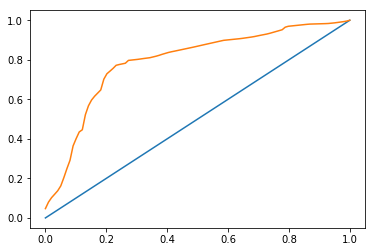

In [15]:
# Train uncalibrated random forest classifier on whole train and validation
# data and evaluate on test data
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss,auc,roc_curve
from scipy import interp

interp_tpr_arr = []
interp_thresh_arr = []
mean_fpr = np.linspace(0, 1, 100)

objective_fpr = [0.01,0.05,0.1]

roc_auc_arr = []
logloss_arr = []

skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print('----')
    clf = RandomForestClassifier(n_estimators=25)
    clf.fit(X.loc[train], y.loc[train])
    clf_probs = clf.predict_proba(X.loc[test])
    fpr, tpr, thresholds = roc_curve(y.loc[test], clf_probs[:,1])
#     print(fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    logloss = log_loss(y.loc[test], clf_probs)
    print(roc_auc,logloss)
    
    roc_auc_arr = np.append(roc_auc_arr, roc_auc)
    logloss_arr = np.append(logloss_arr, logloss)
    
    interp_tpr = interp(mean_fpr, fpr, tpr)
    interp_tpr_arr.append(interp_tpr)
    
    interp_thresh = interp(objective_fpr, fpr, thresholds)
    interp_thresh_arr.append(interp_thresh)

#     mean_tpr[0] = 0.0

mean_tpr = np.array(interp_tpr_arr).mean(axis=0)
roc_auc = roc_auc_arr.mean()
logloss = logloss_arr.mean()
print("average = ",roc_auc,logloss)

plt.plot(np.linspace(0,1),np.linspace(0,1))
plt.plot(mean_fpr,mean_tpr)

interp_thresh = np.array(interp_thresh_arr).mean(axis=0)
print([{"fpr":fpr,"thresh":thresh} for fpr,thresh in zip(objective_fpr,interp_thresh)])